In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
anew=pd.read_csv(r"C:\Users\LENOVO\Downloads\insurance_data.csv")
anew.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


<AxesSubplot:xlabel='age', ylabel='claim'>

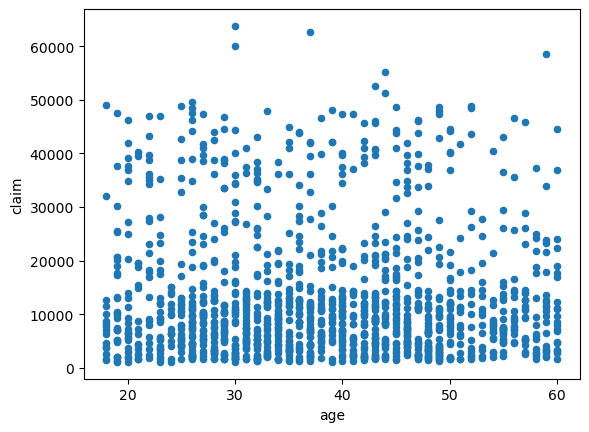

In [3]:
anew.plot(kind='scatter',x='age',y='claim')

In [4]:
anew.corr()

,index,PatientID,age,bmi,bloodpressure,children,claim
index,1.000000,1.000000,-0.007492,0.115129,0.450602,0.128104,0.879268
PatientID,1.000000,1.000000,-0.007492,0.115129,0.450602,0.128104,0.879268
age,-0.007492,-0.007492,1.000000,-0.041955,-0.060325,-0.025547,-0.027909
bmi,0.115129,0.115129,-0.041955,1.000000,0.143544,0.012092,0.197401
bloodpressure,0.450602,0.450602,-0.060325,0.143544,1.000000,-0.031682,0.531341
children,0.128104,0.128104,-0.025547,0.012092,-0.031682,1.000000,0.069233
claim,0.879268,0.879268,-0.027909,0.197401,0.531341,0.069233,1.000000


In [5]:
#going by the data age is inversely propotional to bmi, bp anc claim...even in that the slope would be very less
#bmi is propotional to bp and to the claim too...and although the slope of this is more than the one above but still not so immese

In [6]:
anew.drop(columns=['index','PatientID'],inplace=True)
anew

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [7]:
(anew.isnull().sum()/anew.shape[0]*100).reset_index().rename(columns={0:'missing_value(%)'})

,index,missing_value(%)
0,age,0.373134
1,gender,0.000000
2,bmi,0.000000
3,bloodpressure,0.000000
4,diabetic,0.000000
5,children,0.000000
6,smoker,0.000000
7,region,0.223881
8,claim,0.000000


**some null values in age and region column**

In [8]:
anew.shape[0]

1340

In [9]:
anew['children'].value_counts() 
#children column too is kind of a categorical column

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
anew[['age','bmi','bloodpressure','claim']].describe() 
#mean bmi is 30.6 and median is 30.4 meaning most people are actually obessed
#immense difference between Q3 and max values in both BP and claim...which means too many outliers 
#claim is the most rightly-skewed followed by bloodpressure

,age,bmi,bloodpressure,claim
count,1335.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.668955,94.157463,13252.745642
std,11.102924,6.106735,11.434712,12109.609288
min,18.000000,16.000000,80.000000,1121.870000
25%,29.000000,26.275000,86.000000,4719.685000
50%,38.000000,30.400000,92.000000,9369.615000
75%,47.000000,34.700000,99.000000,16604.305000
max,60.000000,53.100000,140.000000,63770.430000


In [35]:
anew['bloodpressure'].skew()

1.4835342102293079

In [36]:
anew['claim'].skew()

1.5167468509489237

In [37]:
anew['bmi'].skew() 

0.28597245020808587

In [38]:
anew['age'].skew()

0.11361133741072633

<AxesSubplot:ylabel='Density'>

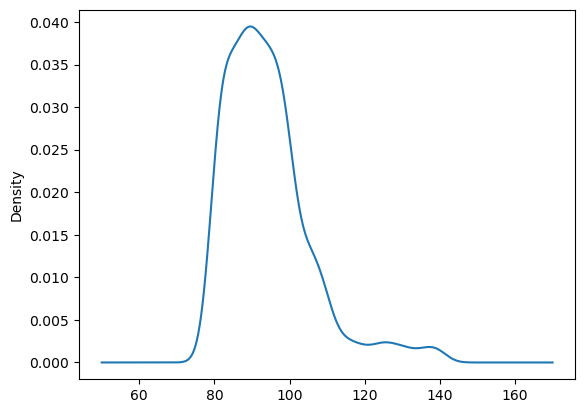

In [23]:
anew['bloodpressure'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

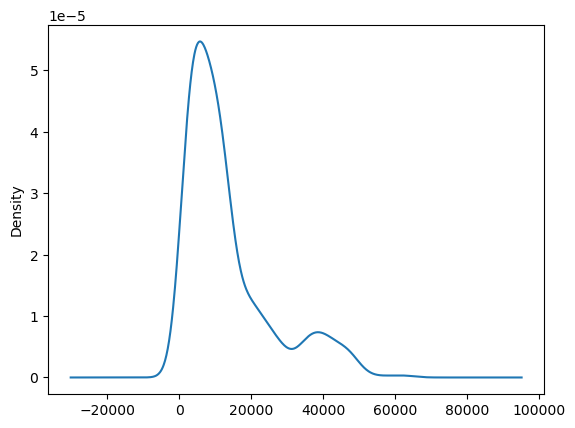

In [24]:
anew['claim'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

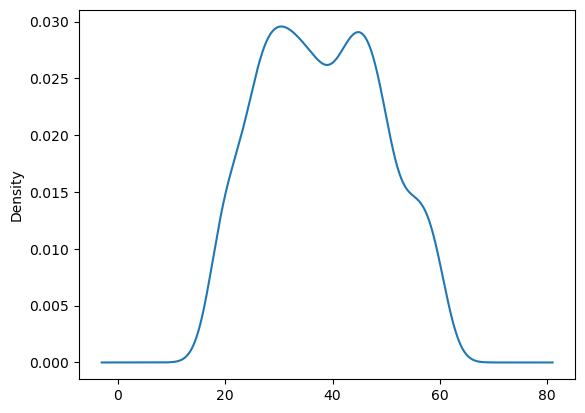

In [21]:
anew['age'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

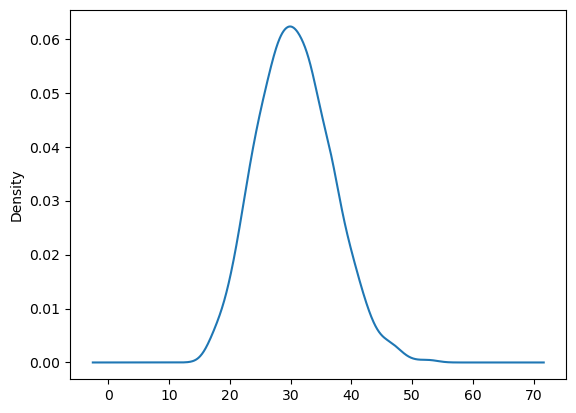

In [22]:
anew['bmi'].plot(kind='kde')

In [25]:
anew['bmi'].skew()
#It has a bell shape but still a bit right skewed(meaning more larger values on right)

0.28597245020808587

In [26]:
anew['age'].skew()

0.11361133741072633

In [27]:
import pandas as pd

# Example DataFrame
data = {
    'Symmetrical': [10, 20, 30, 20, 10],
    'RightSkewed': [10, 20, 30, 40, 100],
    'LeftSkewed': [100, 90, 80, 70, 10]
}
df = pd.DataFrame(data)

# Calculate skewness
print("Symmetrical Skewness:", df['Symmetrical'].skew())
print("Right-Skewed Skewness:", df['RightSkewed'].skew())
print("Left-Skewed Skewness:", df['LeftSkewed'].skew())


Symmetrical Skewness: 0.512240832571883
Right-Skewed Skewness: 1.6970562748477145
Left-Skewed Skewness: -1.6970562748477145


<AxesSubplot:ylabel='Density'>

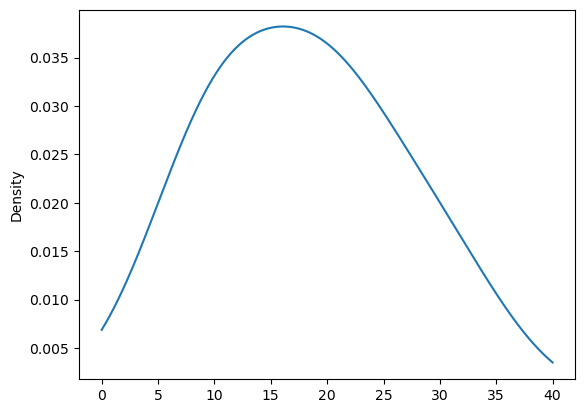

In [33]:
df['Symmetrical'].plot(kind='kde')
#this is near to normal distribution but is relatively right skewed

<AxesSubplot:ylabel='Density'>

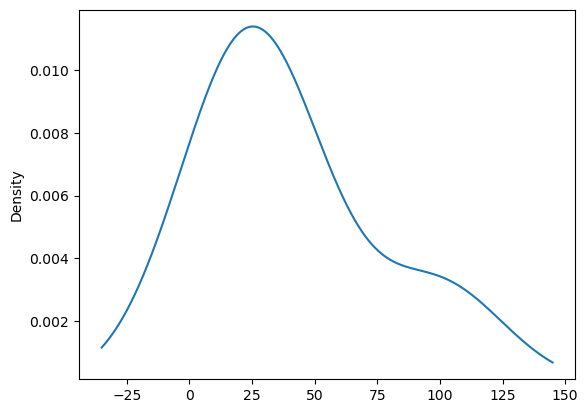

In [31]:
df['RightSkewed'].plot(kind='kde')
#in rightskewed, the right tail(larger values) is longer than the left tail

<AxesSubplot:ylabel='Density'>

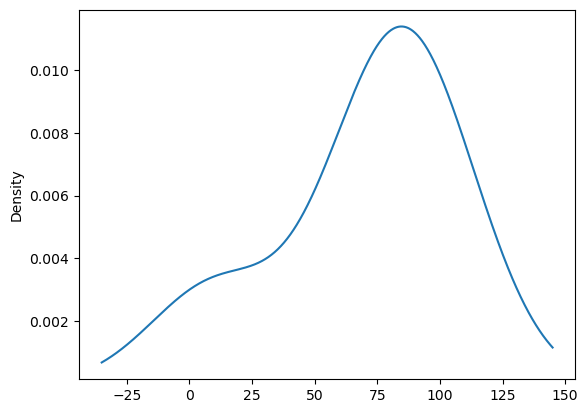

In [32]:
df['LeftSkewed'].plot(kind='kde')
#In leftskewed, the left tail(shorter values) is longer than the right tail

In [16]:
anew.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [40]:
#we will make a new column w.r.t weight
#anyone below 18.5 is underweight, anyone >=18.5 and less than 25 is normal, anyone >=25 and <=30 is overweight, anyone greater 
#than 30 is suffering from obesity

In [11]:
def newend(value):
    if pd.isna(value):
        return np.nan
    elif value<18.5:
        return 'underweight'
    elif value>=18.5 and value<25:
        return 'normal'
    elif value>=25 and value<=30:
        return 'overweight'
    elif value>30:
        return 'obesed'

In [12]:
anew['bmi_cat']=anew['bmi'].apply(lambda x:newend(x))
anew.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,obesed
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,obesed
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,obesed
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,obesed


In [9]:
anew['bmi_cat'].value_counts()

obesed         699
overweight     398
normal         223
underweight     20
Name: bmi_cat, dtype: int64

<AxesSubplot:title={'center':'BMI-CHART'}, ylabel='bmi_cat'>

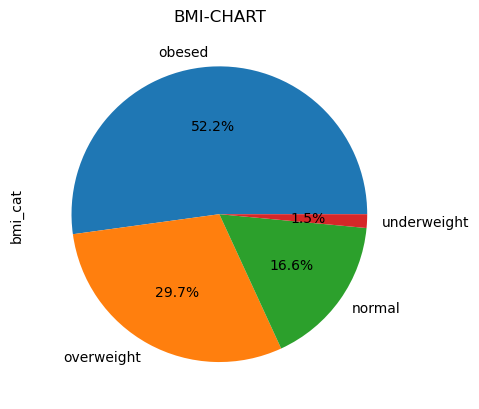

In [10]:
anew['bmi_cat'].value_counts().plot(kind='pie',title='BMI-CHART',autopct='%0.01f%%')
#as we can see from this that 52.2% of the people in this are obesed, 29.7% of them are overweight and so on....

In [11]:
#Average insurance claim with respect to different BMI cat 
anew.groupby('bmi_cat')['claim'].mean().reset_index()

,bmi_cat,claim
0,normal,10340.598744
1,obesed,15565.123934
2,overweight,11044.371809
3,underweight,8852.201500


In [43]:
import numpy as np
a=np.nan()
print(a)

TypeError: 'float' object is not callable

In [44]:
# Example Series
s = pd.Series([1, 2, None, 4, np.nan])

# Check for NaN
print(pd.isna(s))
# Output: A boolean Series indicating True for NaN values
# 0    False
# 1    False
# 2     True
# 3    False
# 4     True
# dtype: bool


0    False
1    False
2     True
3    False
4     True
dtype: bool


In [45]:
s1=np.nan
print(pd.isna(s1))

True


In [12]:
anew.groupby('bmi_cat')['claim'].mean().reset_index().sort_values(by='claim')

,bmi_cat,claim
3,underweight,8852.201500
0,normal,10340.598744
2,overweight,11044.371809
1,obesed,15565.123934


<AxesSubplot:title={'center':'average insurance claim Vs bmi_cat'}, xlabel='bmi_cat'>

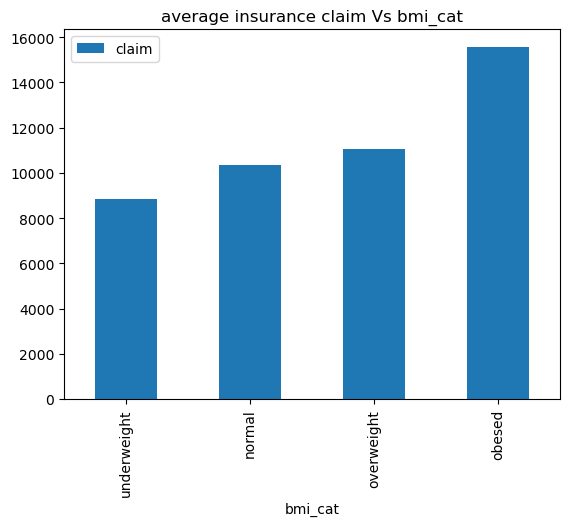

In [13]:
anew.groupby('bmi_cat')['claim'].mean()\
.reset_index()\
.sort_values(by='claim')\
.plot(kind='bar',x='bmi_cat',title='average insurance claim Vs bmi_cat')

In [14]:
#Now we will check the different mean and median age across different bmi_category 
anew.groupby('bmi_cat')['age']\
.agg(func=['mean','median'])\
.reset_index()\
.sort_values('mean',ascending=False)
#all categories have almost the same mean dnd median too...apart from underweight as the median age for that is 35

,bmi_cat,mean,median
2,overweight,39.027638,39.0
3,underweight,38.500000,35.0
0,normal,38.017937,37.0
1,obesed,37.541787,37.0


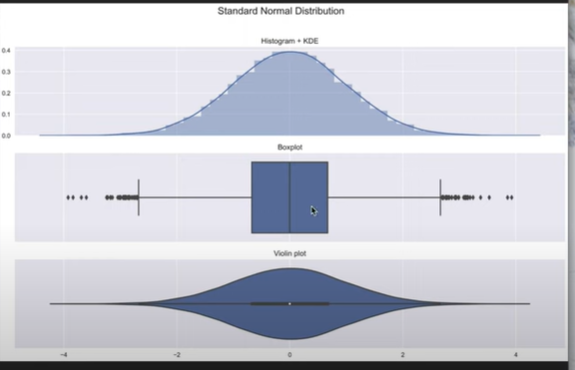

In [74]:
anew.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,obesed
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,obesed
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,obesed
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,obesed


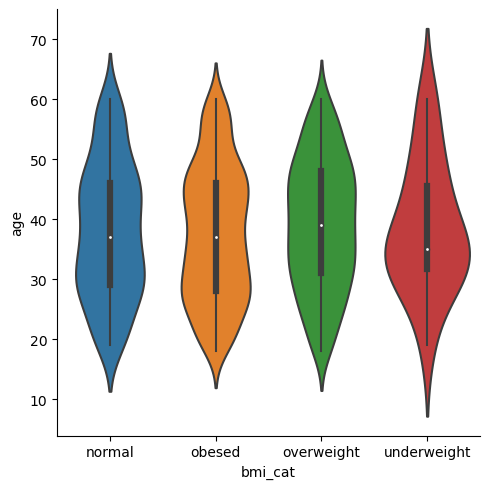

In [15]:
#we will now see the distribution of age w.r.t bmi category 
sns.catplot(kind='violin',x='bmi_cat',y='age',data=anew)
#The underweight category is much more rightly skewed, the IQR of overweight is equal to obesed almost but more than the rest
#the peak of overweight is spread out, although underweight category is rightly skewed, it also has many values spread in the
#lower age ranges... both normal and obessed bmi category are bimodal disributions

In [78]:
#value less than 120 normal, >=120 and <130 elevated, >=130 and <140 hbp-stage1 >=140 and <180 hbp-stage2, >=180 hypertensive
#crisis

In [13]:
import numpy as np
def kuph(value):
    if pd.isna(value):
        return np.nan
    elif value<120:
        return 'normal'
    elif value>=120 and value<130:
        return 'elevated'
    elif value>=130 and value<140:
        return 'hbp-stage1'
    elif value>=140 and value<180:
        return 'hbp-stage2'
    elif value>=180:
        return 'hypertensive'

In [14]:
anew[(anew['bloodpressure']>=120) & (anew['bloodpressure']<130)]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat
1147,29.0,female,32.7,128,Yes,2,No,northwest,26018.95,obesed
1152,38.0,female,35.9,128,No,1,No,northeast,26392.26,obesed
1153,43.0,male,36.8,126,No,2,No,northwest,26467.10,obesed
1154,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51,normal
1166,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33,overweight
1184,45.0,female,36.9,122,Yes,1,No,northeast,31620.00,obesed
1192,47.0,male,31.7,129,Yes,0,Yes,northeast,33732.69,obesed
1194,48.0,female,30.2,129,Yes,0,Yes,southwest,33900.65,obesed
1202,32.0,male,31.7,125,No,0,Yes,southeast,34672.15,obesed
1205,20.0,male,34.9,124,Yes,0,Yes,southwest,34828.65,obesed


In [15]:
anew['bloodpressure_cat']=anew['bloodpressure'].apply(lambda x:kuph(x))
anew.head() 

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,normal,normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,obesed,normal
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,obesed,normal
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,obesed,normal
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,obesed,normal


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,obesed,normal
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,obesed,elevated
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,obesed,normal
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,obesed,normal
1339,30.0,female,47.4,101,No,0,Yes,southeast,63770.43,obesed,normal


In [87]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Score": [85, 42, 90, 70]
}
df = pd.DataFrame(data)
df
# Define a function to style the score column
# def highlight_score(val):
#     if val > 80:
#         return 'color: green'  # Green for scores above 80
#     elif val < 50:
#         return 'color: red'  # Red for scores below 50
#     else:
#         return 'color: black'  # Default black

# Apply the styling function to the entire DataFrame
styled_df = df.style.applymap('color:red')
styled_df


TypeError: the first argument must be callable

In [90]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Score": [85, 42, 90, 70]
}
df = pd.DataFrame(data)
df
# Define a function to style the score column
# def highlight_score(val):
#     if val > 80:
#         return 'color: green'  # Green for scores above 80
#     elif val < 50:
#         return 'color: red'  # Red for scores below 50
#     else:
#         return 'color: black'  # Default black

# Apply the styling function to the entire DataFrame
styled_df = df.style.applymap('color:red',subset=['Name'])
styled_df

TypeError: the first argument must be callable

In [19]:
import pandas as pd 
import numpy as np 

df=pd.DataFrame({
    'Names':['Bob','charles','jaita','kumpa'],
    'age':[11,14,17,19]
})
def change_color(value):
    s='red'
    return f'color:{s}'
styled_df=df.style.applymap(change_color,subset=['Names'])
styled_df

,Names,age
0,Bob,11
1,charles,14
2,jaita,17
3,kumpa,19


In [20]:
def change_color1(values):
    if values>15:
        s1='red'
    else:
        s1='blue'
    return f"color:{s1}"
styled_df1=df.style.applymap(change_color1,subset=['age'])
styled_df1

,Names,age
0,Bob,11
1,charles,14
2,jaita,17
3,kumpa,19


In [94]:
anew.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,normal,normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,obesed,normal
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,obesed,normal
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,obesed,normal
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,obesed,normal


In [101]:
anew['bmi_cat'].value_counts()

obesed         699
overweight     398
normal         223
underweight     20
Name: bmi_cat, dtype: int64

In [95]:
#now we will find the claim w.r.t bmi_category ....based on all aggregates mean,median,max and min

In [21]:
def changed_color2(value):
    color='red' if value<30000 else 'blue' if value>60000 else 'black'
    return f"color:{color}"

In [22]:
anew.groupby('bloodpressure_cat')['claim']\
.agg(func=['mean','median','max','min'])\
.sort_values(by='mean',ascending=False)\
.style.applymap(changed_color2)

,mean,median,max,min
bloodpressure_cat,,,,
elevated,38810.656000,38496.875000,58571.070000,26018.950000
hbp-stage2,38323.496000,36950.260000,43753.340000,35491.640000
hbp-stage1,37002.625833,38495.975000,48517.560000,26140.360000
normal,12111.380937,8871.150000,63770.430000,1121.870000


In genral people with normal blood pressure category claim less, the mean ,median and even minimum category is lesser than that of the other categories but surprisingly the maximum amount of money too has been claimed by a person with normal blood pressure

In [23]:
def changed_color3(value):
    color='red' if value<30000 else 'blue' if value>60000 else 'black'
    return f"color:{color}"

In [24]:
anew.groupby('bloodpressure_cat')['claim']\
.agg(func=['mean','median','max','min'])\
.sort_values(by='mean',ascending=False)\
.style.applymap(changed_color3)

,mean,median,max,min
bloodpressure_cat,,,,
elevated,38810.656000,38496.875000,58571.070000,26018.950000
hbp-stage2,38323.496000,36950.260000,43753.340000,35491.640000
hbp-stage1,37002.625833,38495.975000,48517.560000,26140.360000
normal,12111.380937,8871.150000,63770.430000,1121.870000


In [97]:
anew['claim'].describe() 

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [110]:
anew[(anew['bloodpressure_cat']=='elevated')&(anew['bmi_cat']=='underweight')]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat


In [25]:
anew[(anew['bloodpressure_cat']=='hbp-stage1')&(anew['bmi_cat']=='underweight')]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat


In [26]:
anew[(anew['bloodpressure_cat']=='hbp-stage2')&(anew['bmi_cat']=='underweight')]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat


In [27]:
anew[(anew['bloodpressure_cat']=='hbp-stage2')&(anew['bmi_cat']=='overweight')]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat


In [28]:
import pandas as pd

data = {
    "Category": ["A", "B", "A", "B", "A", "B", "C"],
    "Sub-Category": ["X", "X", "Y", "Y", "X", "Y", "X"],
    "Sales": [100, 200, 150, 300, 400, 500, 600],
    "Profit": [20, 30, 25, 50, 40, 60, 70],
}

df = pd.DataFrame(data)
print(df)


  Category Sub-Category  Sales  Profit
0        A            X    100      20
1        B            X    200      30
2        A            Y    150      25
3        B            Y    300      50
4        A            X    400      40
5        B            Y    500      60
6        C            X    600      70


In [30]:
df.pivot_table(values='Sales',index='Category',columns='Sub-Category')
#mean values of Sales for unique values of Sales and Category respectively

Sub-Category,X,Y
Category,,
A,250.0,150.0
B,200.0,400.0
C,600.0,NaN


In [31]:
df.pivot_table(values='Profit',index='Category',columns='Sub-Category')

Sub-Category,X,Y
Category,,
A,30.0,25.0
B,30.0,55.0
C,70.0,NaN


In [32]:
df.pivot_table(values=['Sales','Profit'],index='Category',columns='Sub-Category')

Profit        Sales       
Sub-Category      X     Y      X      Y
Category                               
A              30.0  25.0  250.0  150.0
B              30.0  55.0  200.0  400.0
C              70.0   NaN  600.0    NaN

In [36]:
def color1(value):
    color='green' if value>50 else 'blue' if value<30 else 'black'
    return f"color:{color}"

In [41]:
def color2(value):
    color='#f217ce' if value>300 else '#5aef0a' if value<250 else '#5162a5'
    return f"color:{color}"

In [42]:
df.pivot_table(values=['Sales','Profit'],index='Category',columns='Sub-Category')\
.style.highlight_null(null_color='#17f2c7')\
.applymap(color1,subset=['Profit'])\
.applymap(color2,subset=['Sales'])

In [43]:
#mean age and mean claim calculation with respect to unique values of bmi_cat and bloodpressure_cat

In [44]:
anew.head() 

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,normal,normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,obesed,normal
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,obesed,normal
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,obesed,normal
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,obesed,normal


In [45]:
anew.pivot_table(values=['age','claim'],index='bloodpressure_cat',columns='bmi_cat')

age                                           claim  \
bmi_cat               normal     obesed overweight underweight        normal   
bloodpressure_cat                                                              
elevated           31.000000  38.464286  23.000000         NaN  26926.510000   
hbp-stage1         34.000000  37.277778  43.250000         NaN  27206.905000   
hbp-stage2               NaN  39.000000        NaN         NaN           NaN   
normal             38.086364  37.497667  39.025445        38.5  10111.878182   

                                                           
bmi_cat                  obesed    overweight underweight  
bloodpressure_cat                                          
elevated           39617.565714  28101.330000         NaN  
hbp-stage1         39436.772222  30946.827500         NaN  
hbp-stage2         38323.496000           NaN         NaN  
normal             13687.114830  10798.400356   8852.2015

In [51]:
anew.pivot_table(values=['age','claim'],index='bloodpressure_cat',columns='bmi_cat')\
.style.highlight_null(null_color='#17f2c7')\
.applymap(change_age_color,subset=['age'])\
.applymap(change_claim_color,subset=['claim'])

In [52]:
#from the above we get that all the underweight people have normal bloodpressure, people with normal bmi_cat mostly claim the
#least

In [49]:
def change_age_color(value):
    color='red' if value<30 else 'black'
    return f"color:{color}"

In [50]:
def change_claim_color(value):
    color='red' if value<30000 else 'black'
    return f"color:{color}"

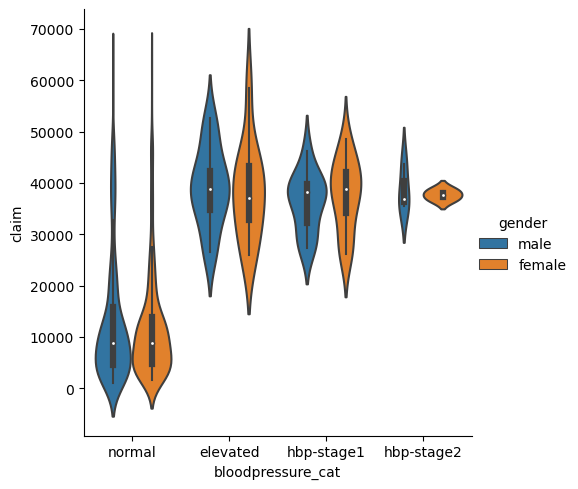

In [54]:
import seaborn as sns 
sns.catplot(kind='violin',x='bloodpressure_cat',y='claim',data=anew,hue='gender')

The females have a much larger range in the elevated bloodpressure_cat than the males and the same is the case for hbp-stage1 where the females have a much larger range for claims than males....in case of hbp-stage 2 though the females have a very small range of claims being made while the males have a much larger range of claims being made 

**Now we will see the distribution of gender Vs claim with respect to each region.**

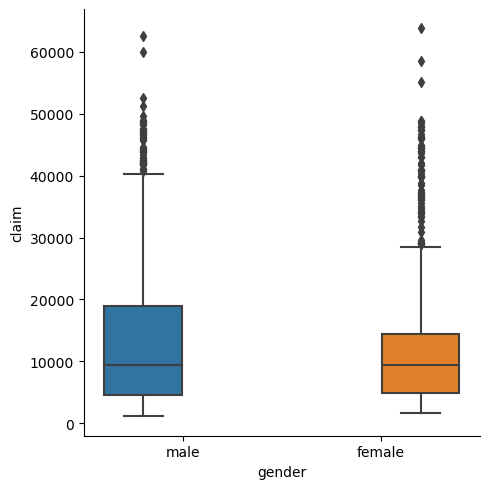

In [56]:
import seaborn as sns 
sns.catplot(kind='box',data=anew,x='gender',y='claim',hue='gender')

In [57]:
#This is overall...but we want to see it for each region

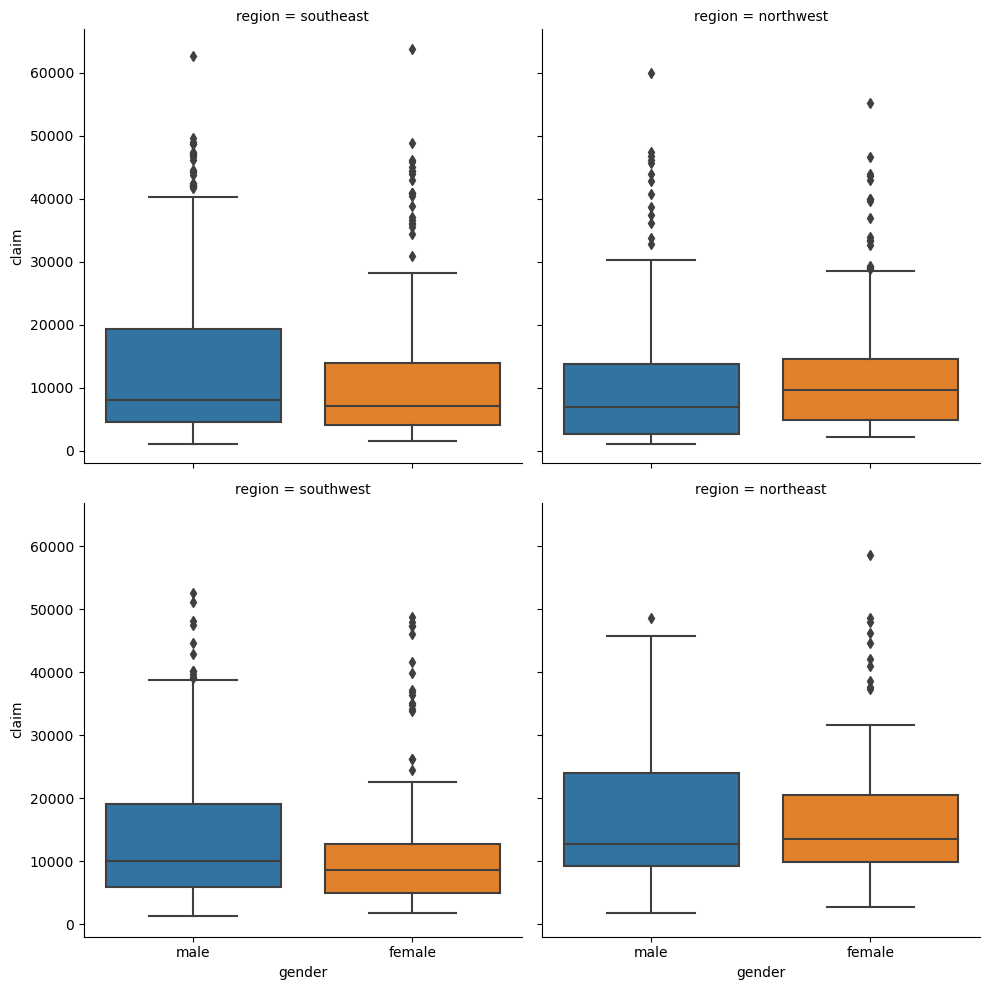

In [60]:
import seaborn as sns 
sns.catplot(data=anew,x='gender',y='claim',col='region',kind='box',col_wrap=2)

**From the above, we see that IQR for all the males are much bigger than females although the medians in northwest and northeast region are more in case of females than those of males**

In [61]:
#Now we have to plot a boxplot between gender and age for both smoker and non-smoker in different regions

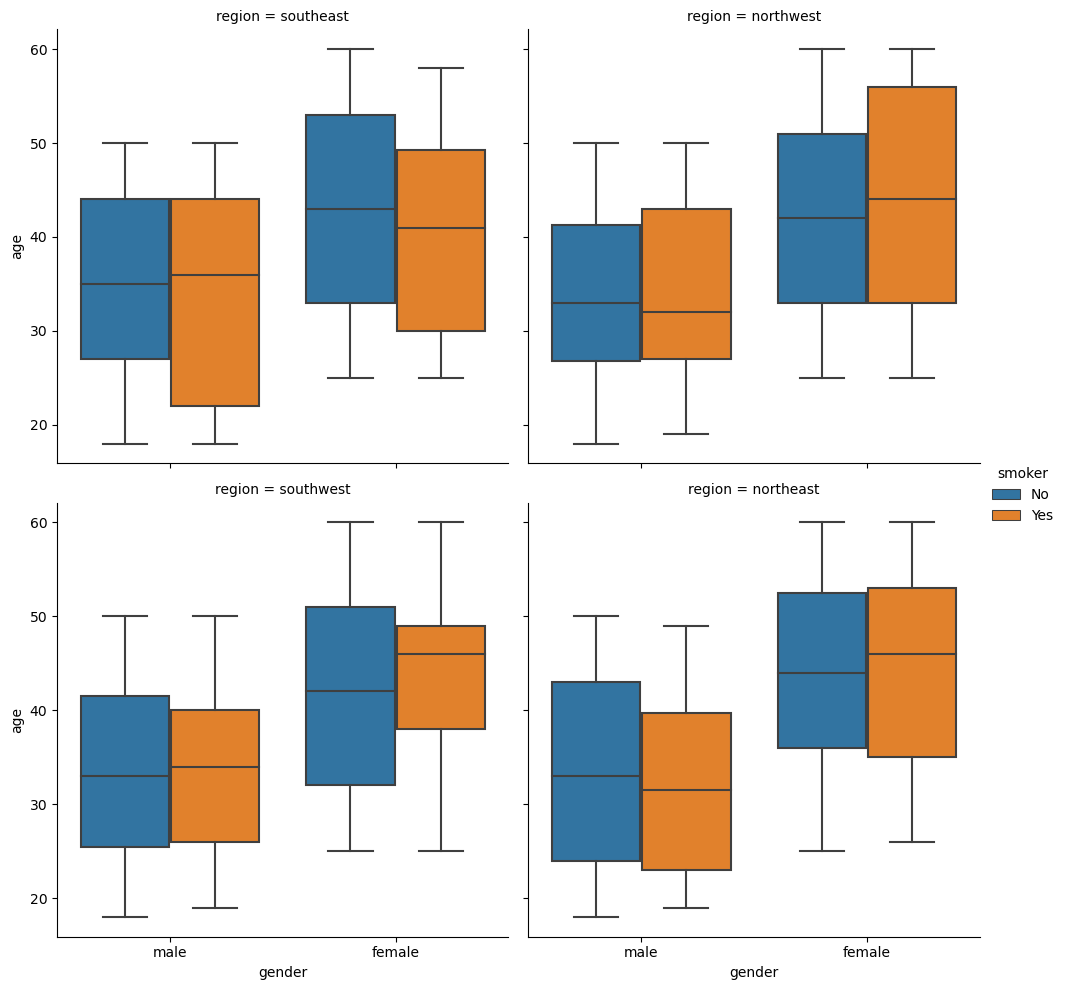

In [66]:
import seaborn as sns 
sns.catplot(data=anew.dropna(),x='gender',y='age',hue='smoker',col='region',col_wrap=2,kind='box')

**IQR for smoking males in southeast and northwest region is greater than the non-smoking males , in southwest and notheast region IQR for non-smoking males is greater...IQR makes 50% of the values, no outliers in any of the graphs**

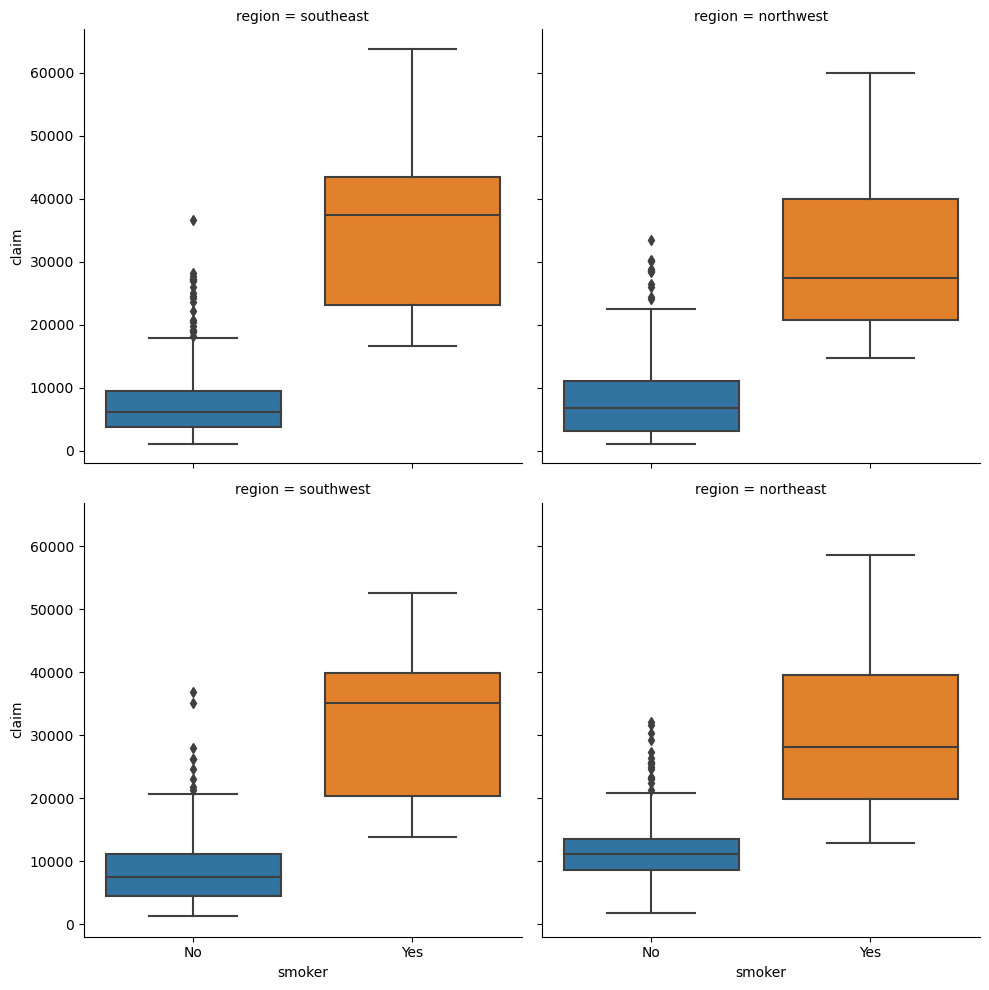

In [68]:
import seaborn as sns 
sns.catplot(data=anew.dropna(),x='smoker',y='claim',col='region',kind='box',col_wrap=2)

**from above we see that smokers in genral have claimed more than non-smokers which is understandable**

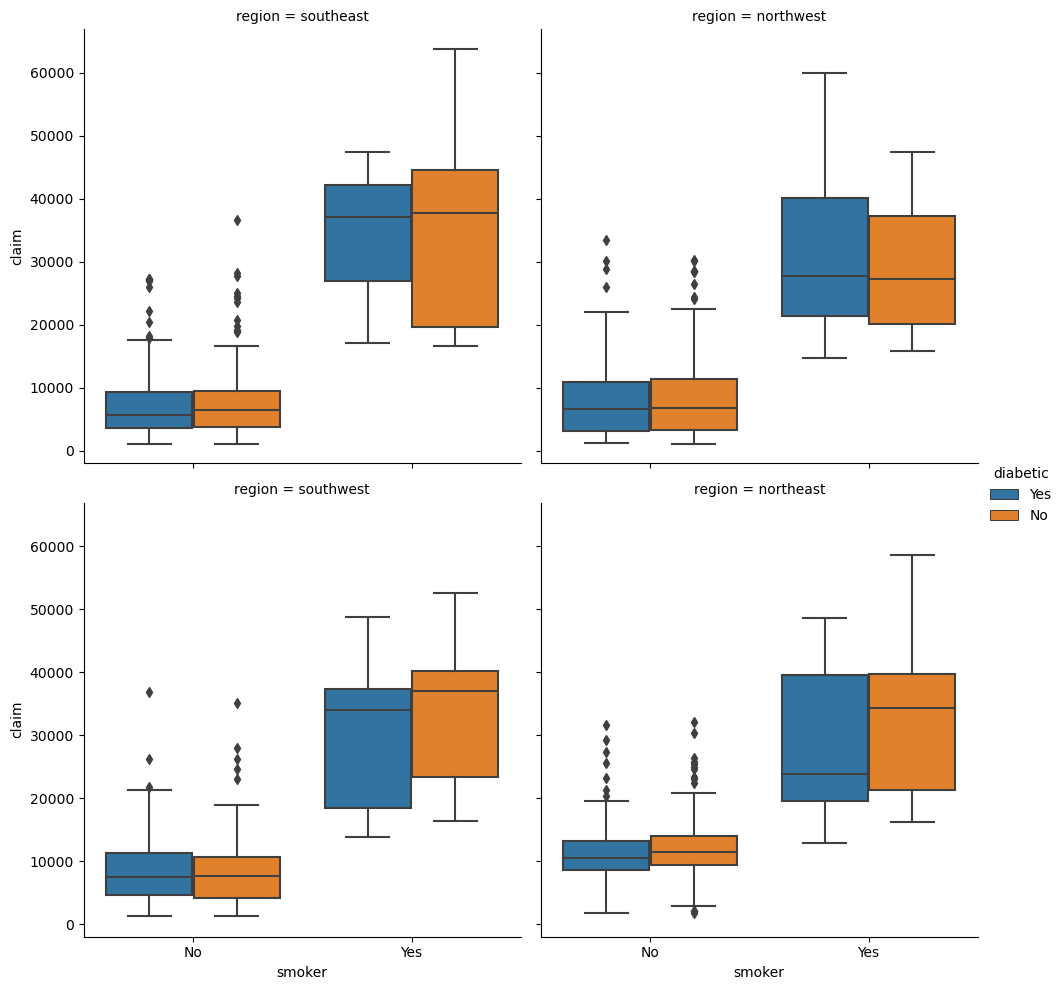

In [72]:
import seaborn as sns 
sns.catplot(data=anew.dropna(),x='smoker',y='claim',hue='diabetic',col='region',col_wrap=2,kind='box')

**Diabetic smokers and non-smokers have almost the same IQR as the non-diabetic smokers and non-smokers**

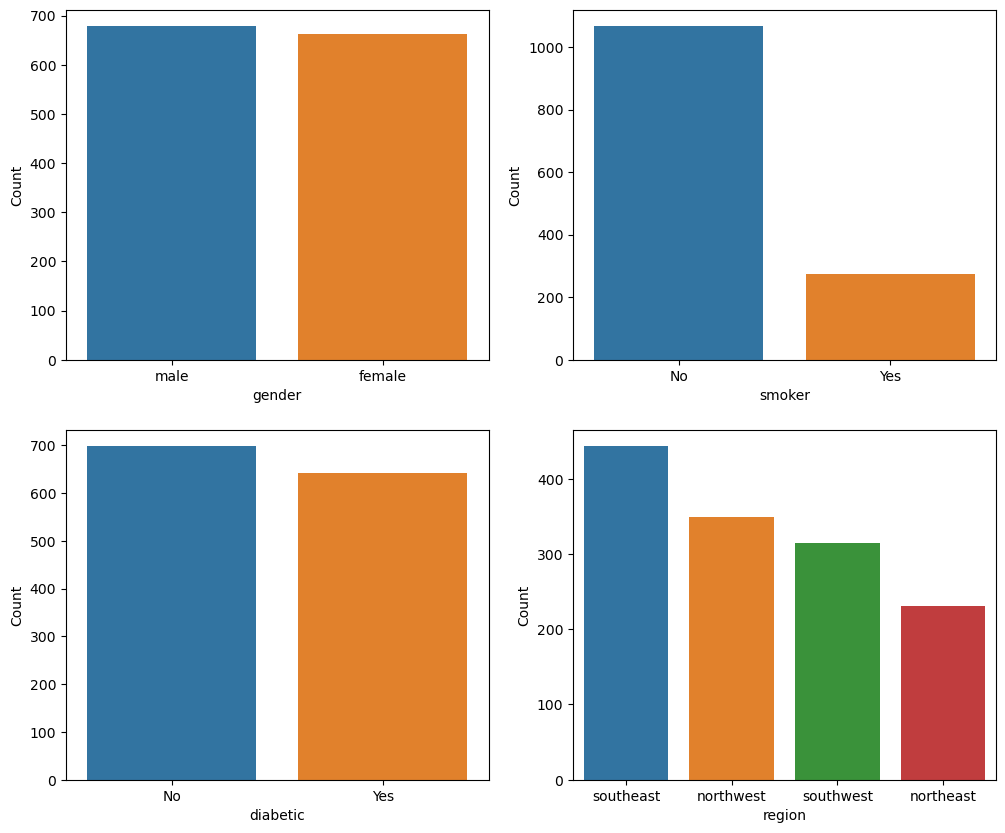

In [81]:
import matplotlib.pyplot as plt
cat_variable=['gender','smoker','diabetic','region']
fig,axs=plt.subplots(2,2,figsize=(12,10))
for index,ax in enumerate(fig.axes):
    sns.barplot(y=anew[cat_variable[index]].value_counts(),
               x=anew[cat_variable[index]].value_counts().index,ax=ax)
    ax.set_xlabel(cat_variable[index])
    ax.set_ylabel('Count')
plt.show()
#enumerate(fig.axes) would give [(0, axs[0, 0]), (1, axs[0, 1]), (2, axs[1, 0]), (3, axs[1, 1])] this output, fig refers to entire
#figure and axs refers to specific subplots of the figure

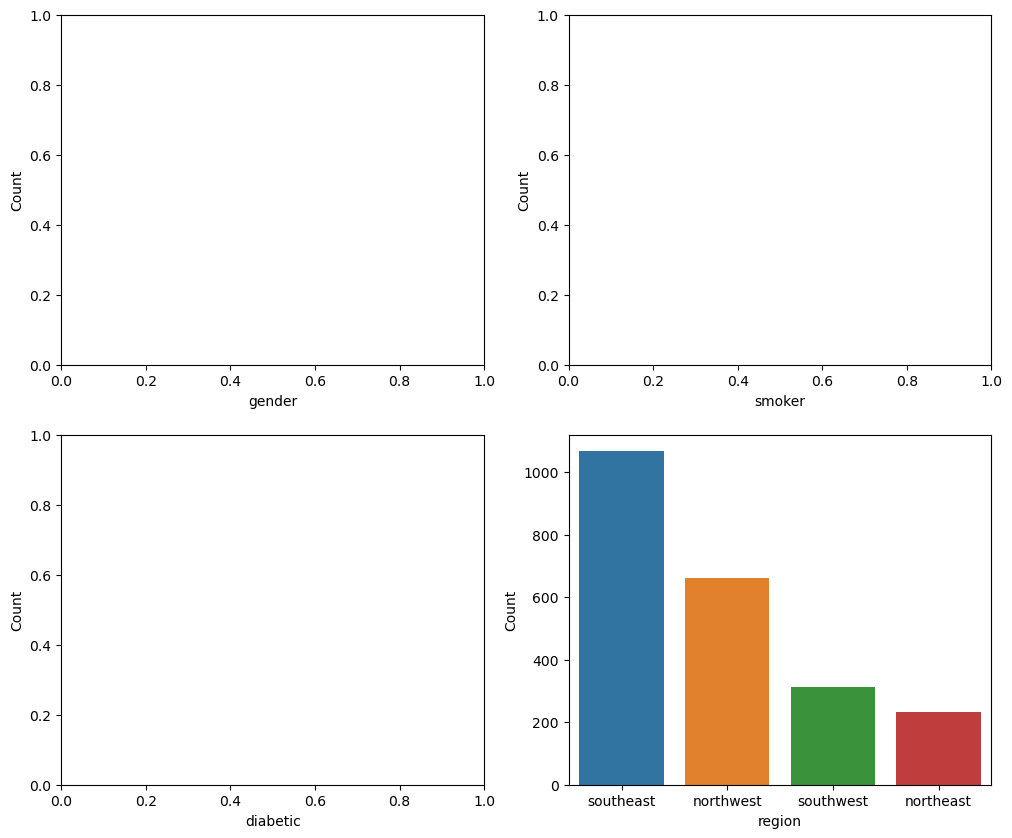

In [82]:
import matplotlib.pyplot as plt
cat_variable=['gender','smoker','diabetic','region']
fig,axs=plt.subplots(2,2,figsize=(12,10))
for index,ax in enumerate(fig.axes):
    sns.barplot(y=anew[cat_variable[index]].value_counts(),
               x=anew[cat_variable[index]].value_counts().index)
    ax.set_xlabel(cat_variable[index])
    ax.set_ylabel('Count')
plt.show()

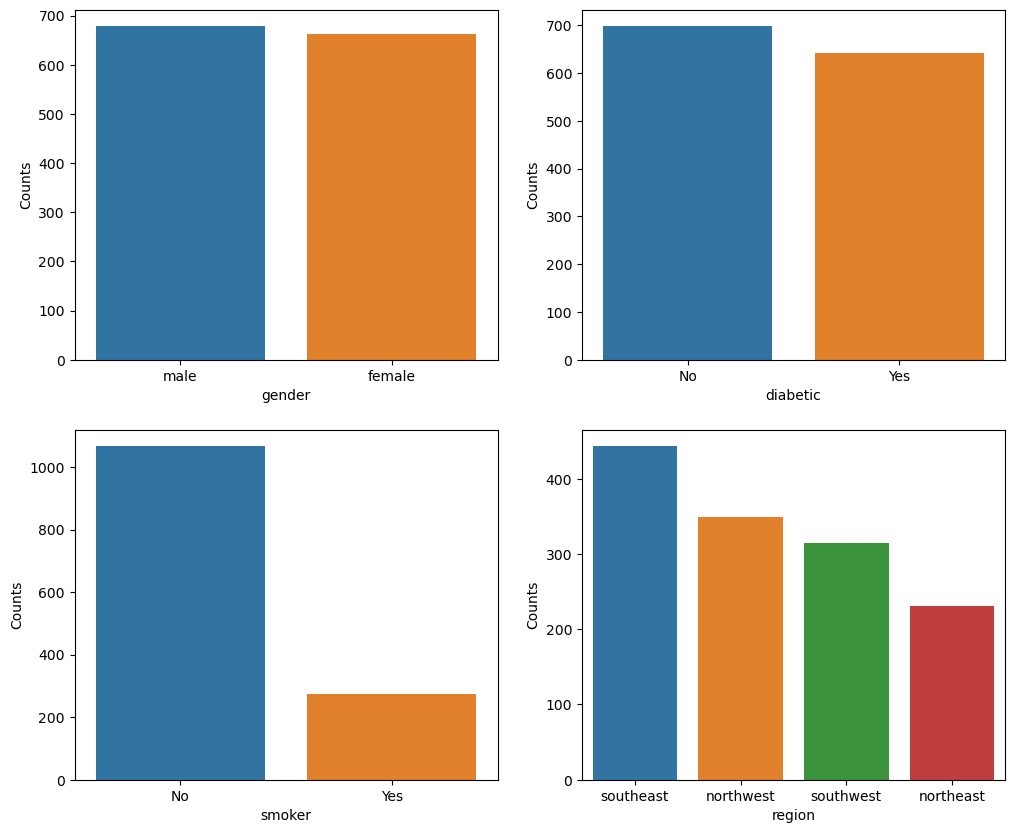

In [86]:
import matplotlib.pyplot as plt 
import seaborn as sns 
cat1=['gender','diabetic','smoker','region']
fig,axs=plt.subplots(2,2,figsize=(12,10))
for index,ax in enumerate(fig.axes):
    sns.barplot(x=anew[cat1[index]].value_counts().index,
                y=anew[cat1[index]].value_counts(),ax=ax)
    ax.set_xlabel(cat1[index])
    ax.set_ylabel('Counts')
plt.show() 
#fig represents the entire figure and axs represents each subplot of that figure. 

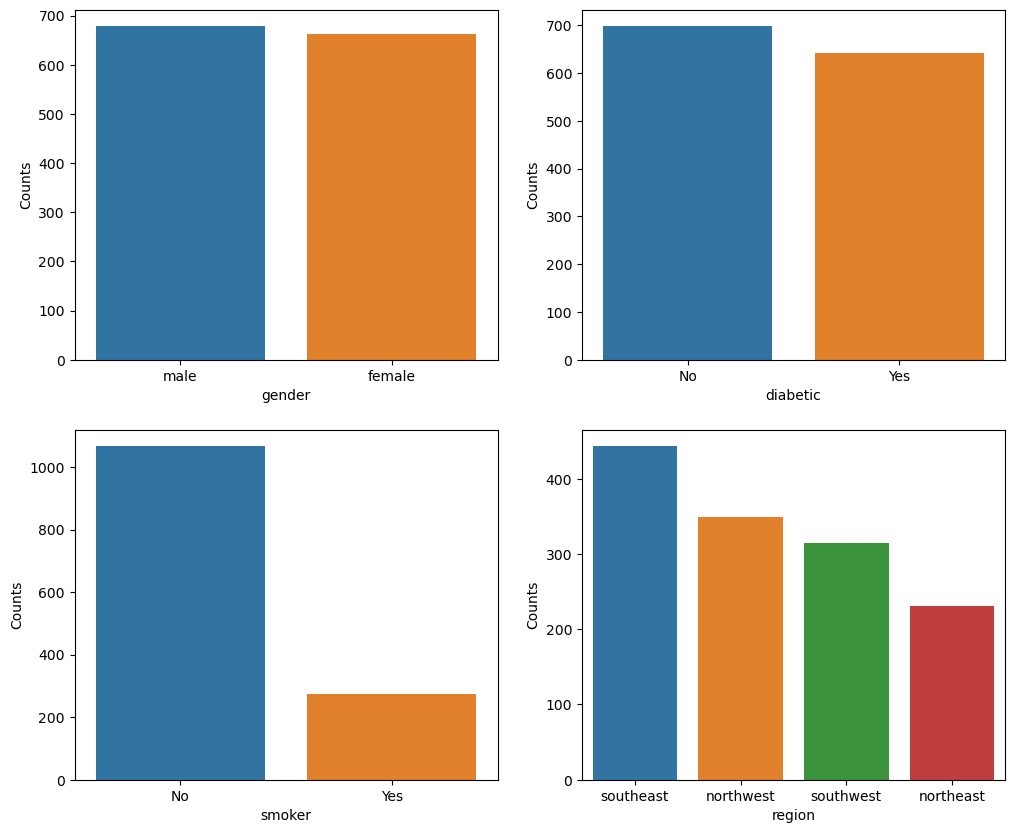

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
cat1=['gender','diabetic','smoker','region']
fig,axs=plt.subplots(2,2,figsize=(12,10))
for index,ax in enumerate(fig.axes):
    sns.barplot(x=anew[cat1[index]].value_counts().index,
               y=anew[cat1[index]].value_counts(),ax=ax)
    ax.set_xlabel(cat1[index])
    ax.set_ylabel('Counts')
plt.show()

**Frome above we get that there are more males than females, more non-diabetic people than diabetic people, much more non-smokers than smokers and much more people from southeast region than any other region**

In [78]:
fig.axes

[<AxesSubplot:xlabel='gender', ylabel='Count'>,
 <AxesSubplot:xlabel='smoker', ylabel='Count'>,
 <AxesSubplot:xlabel='diabetic', ylabel='Count'>,
 <AxesSubplot:xlabel='region', ylabel='Count'>]

In [16]:
anew.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_cat,bloodpressure_cat
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,normal,normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,obesed,normal
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,obesed,normal
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,obesed,normal
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,obesed,normal
